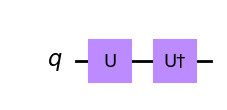

In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import random_unitary

# Define a quantum circuit with 1 qubit
qc = QuantumCircuit(1)

# Generate a random unitary matrix U
U = random_unitary(2).data

# Apply the unitary U to the qubit
qc.unitary(U, 0, label='U')

# Apply the inverse of U, denoted U†
qc.unitary(U.conj().T, 0, label='U†')

# Visualize the circuit
qc.draw('mpl')


**Unitary matrix U:**

Operator([[ 0.315869  +0.21836423j,  0.1787616 -0.90586319j],
          [ 0.52907496+0.75671892j, -0.20090549+0.32725089j]],
         input_dims=(2,), output_dims=(2,))

Initial state vector:
Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
Bloch sphere initially:


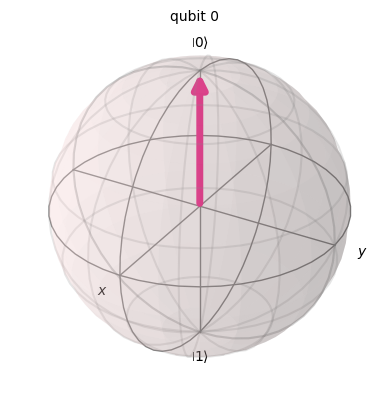

Statevector after U:
Statevector([0.315869  +0.21836423j, 0.52907496+0.75671892j],
            dims=(2,))
Bloch sphere after U:


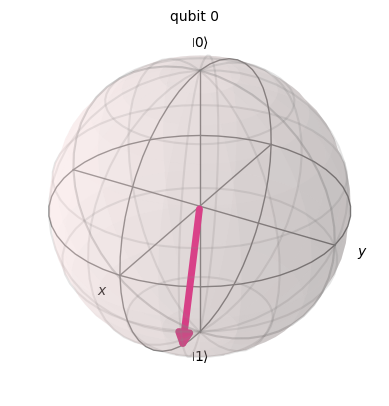

Statevector after U†:
Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
Bloch sphere after U†:


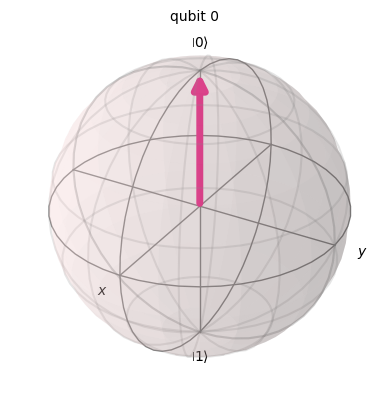

In [9]:
%matplotlib inline
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector, random_unitary
from IPython.display import display, Markdown

# Function to create a gate, apply it and its inverse, and visualize the state and Bloch sphere
def visualize_gate_and_inverse():
    # Generate a random unitary matrix
    U = random_unitary(2)
    
    # Display the generated unitary matrix U
    display(Markdown('**Unitary matrix U:**'))
    display(U)
    
    # Create a quantum circuit with one qubit
    qc = QuantumCircuit(1)
    
    # Initial state (|0>)
    initial_state = Statevector([1, 0])
    print("Initial state vector:")
    display(initial_state)
    
    # Visualize on Bloch sphere
    bloch_initial = plot_bloch_multivector(initial_state)
    print("Bloch sphere initially:")
    display(bloch_initial)

    # Apply U to the qubit
    qc.unitary(U, [0], label='U')
    
    # Execute the circuit and get the statevector after applying U
    backend = Aer.get_backend('statevector_simulator')
    job = execute(qc, backend)
    state_after_U = job.result().get_statevector()
    
    # Statevector and Bloch sphere after U
    print("Statevector after U:")
    display(state_after_U)
    bloch_after_U = plot_bloch_multivector(state_after_U)
    print("Bloch sphere after U:")
    display(bloch_after_U)

    # Apply the inverse of U
    qc.unitary(U.adjoint(), [0], label='U†')
    
    # Execute the circuit and get the statevector after applying the inverse of U
    job = execute(qc, backend)
    state_after_U_inv = job.result().get_statevector()
    
    # Statevector and Bloch sphere after U†
    print("Statevector after U†:")
    display(state_after_U_inv)
    bloch_after_U_inv = plot_bloch_multivector(state_after_U_inv)
    print("Bloch sphere after U†:")
    display(bloch_after_U_inv)

# Call the function to visualize the statevectors and Bloch spheres
visualize_gate_and_inverse()


Initial state (|0>) on Bloch sphere:


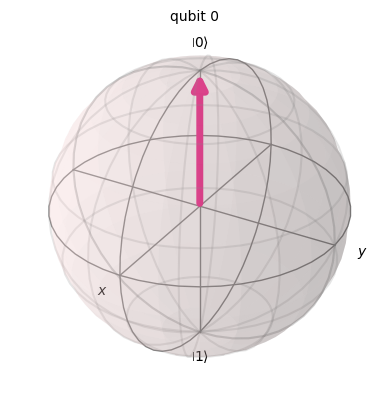

Final state (|1>) on Bloch sphere after Pauli-X gate:


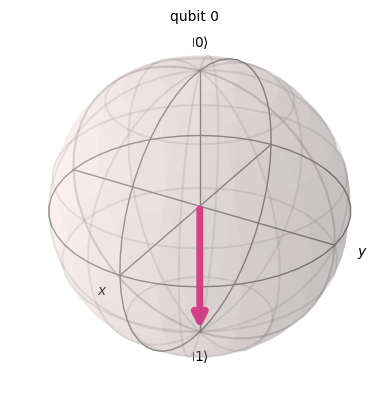

In [11]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector

# Function to visualize the Bloch sphere before and after Pauli-X gate
def visualize_pauli_x():
    # Create a quantum circuit with one qubit
    qc = QuantumCircuit(1)
    
    # Initial state (|0>)
    initial_state = Statevector.from_label('0')
    print("Initial state (|0>) on Bloch sphere:")
    display(plot_bloch_multivector(initial_state))
    
    # Apply the Pauli-X gate to the qubit
    qc.x(0)
    
    # Execute the circuit and get the final statevector
    backend = Aer.get_backend('statevector_simulator')
    result = execute(qc, backend).result()
    final_state = result.get_statevector()
    
    # Final state (|1>) on Bloch sphere after Pauli-X gate
    print("Final state (|1>) on Bloch sphere after Pauli-X gate:")
    display(plot_bloch_multivector(final_state))

# Call the function to visualize the Bloch spheres
visualize_pauli_x()


# Reversible NOT: Pauli X gate

Initial state vector (|0>):


<IPython.core.display.Latex object>

Bloch sphere representation of the initial state:


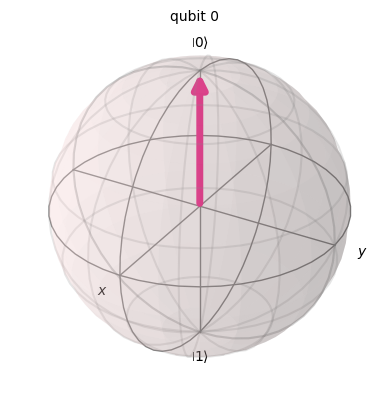

   ┌───┐
q: ┤ X ├
   └───┘
Matrix representation of the Pauli-X gate:


<IPython.core.display.Latex object>

Final state vector (|1>) after applying the Pauli-X gate:


<IPython.core.display.Latex object>

Bloch sphere representation of the final state:


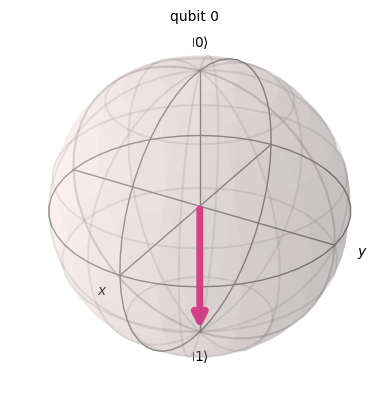

In [12]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_bloch_multivector, array_to_latex
from qiskit.quantum_info import Statevector, Operator

# Function to visualize the state vectors and the Pauli-X gate matrix
def visualize_pauli_x_with_matrices():
    # Create a quantum circuit with one qubit
    qc = QuantumCircuit(1)
    
    # Initial state (|0>)
    initial_state = Statevector.from_label('0')
    print("Initial state vector (|0>):")
    display(array_to_latex(initial_state))
    print("Bloch sphere representation of the initial state:")
    display(plot_bloch_multivector(initial_state))
    
    # Apply the Pauli-X gate to the qubit
    qc.x(0)
    # Visualize the circuit
    print(qc)
    
    # Display the matrix for the Pauli-X gate
    pauli_x_matrix = Operator(qc).data
    print("Matrix representation of the Pauli-X gate:")
    display(array_to_latex(pauli_x_matrix))
    
    # Execute the circuit and get the final statevector
    backend = Aer.get_backend('statevector_simulator')
    result = execute(qc, backend).result()
    final_state = result.get_statevector()
    
    # Final state vector (|1>) after Pauli-X gate
    print("Final state vector (|1>) after applying the Pauli-X gate:")
    display(array_to_latex(final_state))
    print("Bloch sphere representation of the final state:")
    display(plot_bloch_multivector(final_state))

# Call the function
visualize_pauli_x_with_matrices()


# CNOT GATE- REVERSIBLE XOR 

Initial state vectors:


<IPython.core.display.Latex object>

Bloch sphere representation of the initial states:


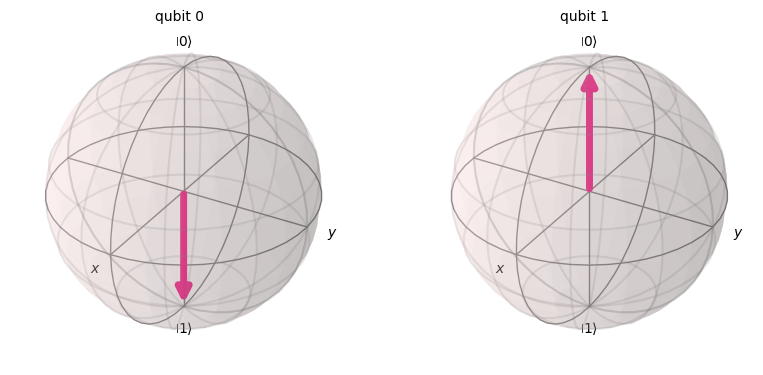

Quantum circuit with CNOT gate:
     ┌───┐     
q_0: ┤ X ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
Matrix representation of the CNOT gate:


<IPython.core.display.Latex object>

Final state vectors after applying the CNOT gate:


<IPython.core.display.Latex object>

Bloch sphere representation of the final states:


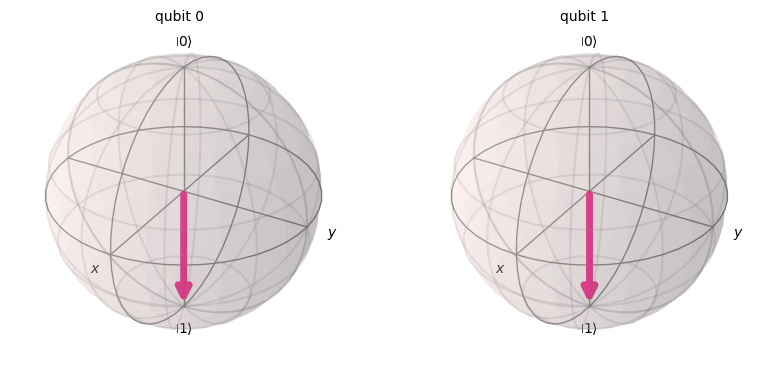

In [13]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_bloch_multivector, array_to_latex
from qiskit.quantum_info import Statevector, Operator

# Function to visualize the Bloch spheres and the CNOT gate matrix
def visualize_reversible_xor():
    # Create a quantum circuit with two qubits
    qc = QuantumCircuit(2)
    
    # Prepare the initial state where the control qubit is |1> and target qubit is |0>
    qc.x(0)  # Applying a NOT gate to the first qubit to change its state to |1>
    initial_state = Statevector.from_instruction(qc)
    print("Initial state vectors:")
    display(array_to_latex(initial_state))
    print("Bloch sphere representation of the initial states:")
    display(plot_bloch_multivector(initial_state))
    
    # Apply the CNOT gate
    qc.cx(0, 1)
    
    # Display the quantum circuit
    print("Quantum circuit with CNOT gate:")
    print(qc)
    
    # Display the matrix for the CNOT gate
    cnot_matrix = Operator(qc).data
    print("Matrix representation of the CNOT gate:")
    display(array_to_latex(cnot_matrix))
    
    # Execute the circuit and get the final statevector
    backend = Aer.get_backend('statevector_simulator')
    job = execute(qc, backend)
    final_state = job.result().get_statevector()
    
    # Final state vectors after CNOT gate
    print("Final state vectors after applying the CNOT gate:")
    display(array_to_latex(final_state))
    print("Bloch sphere representation of the final states:")
    display(plot_bloch_multivector(final_state))

# Call the function to visualize the reversible XOR
visualize_reversible_xor()


Initial state vectors (both qubits in |0>):


<IPython.core.display.Latex object>

Bloch sphere representation of the initial states:


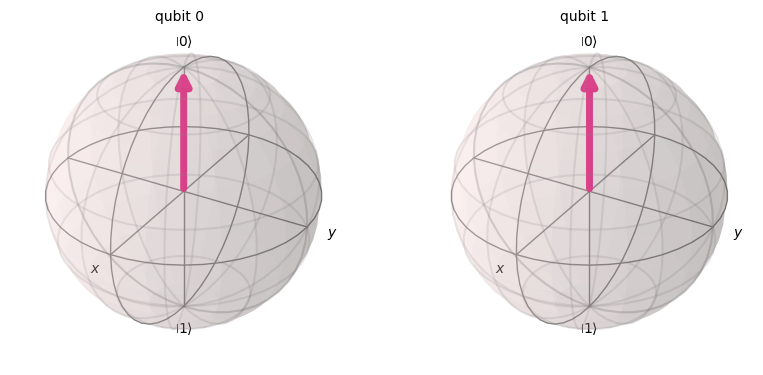

Quantum circuit with CNOT gate:
          
q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘
Matrix representation of the CNOT gate:


<IPython.core.display.Latex object>

Final state vectors after applying the CNOT gate:


<IPython.core.display.Latex object>

Bloch sphere representation of the final states:


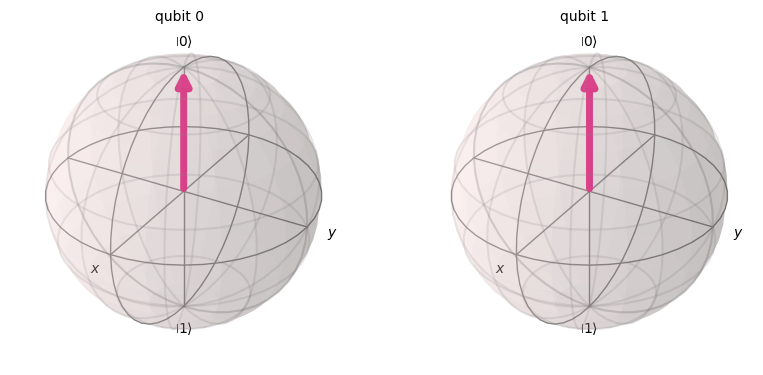

In [14]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_bloch_multivector, array_to_latex
from qiskit.quantum_info import Statevector, Operator

# Function to visualize the Bloch spheres and the CNOT gate matrix
def visualize_reversible_xor_control_0():
    # Create a quantum circuit with two qubits both initialized to |0>
    qc = QuantumCircuit(2)
    
    # Initial state vector for the two qubits
    initial_state = Statevector.from_label('00')
    print("Initial state vectors (both qubits in |0>):")
    display(array_to_latex(initial_state))
    print("Bloch sphere representation of the initial states:")
    display(plot_bloch_multivector(initial_state))
    
    # Apply the CNOT gate with the first qubit as control and the second as target
    qc.cx(0, 1)
    
    # Display the quantum circuit
    print("Quantum circuit with CNOT gate:")
    print(qc)
    
    # Display the matrix for the CNOT gate
    cnot_matrix = Operator(qc).data
    print("Matrix representation of the CNOT gate:")
    display(array_to_latex(cnot_matrix))
    
    # Execute the circuit and get the final statevector
    backend = Aer.get_backend('statevector_simulator')
    job = execute(qc, backend)
    final_state = job.result().get_statevector()
    
    # Final state vectors after CNOT gate
    print("Final state vectors after applying the CNOT gate:")
    display(array_to_latex(final_state))
    print("Bloch sphere representation of the final states:")
    display(plot_bloch_multivector(final_state))

# Call the function to visualize the reversible XOR with control qubit in |0>
visualize_reversible_xor_control_0()


Here's what each element of the state vector corresponds to:

The first element (1) corresponds to the probability amplitude of both qubits being in the 
∣
00
⟩
∣00⟩ state.
The second element (0) corresponds to the amplitude of the system being in the 
∣
01
⟩
∣01⟩ state.
The third element (0) corresponds to the amplitude of the system being in the 
∣
10
⟩
∣10⟩ state.
The fourth element (0) corresponds to the amplitude of the system being in the 
∣
11
⟩
∣11⟩ state.

# Reversible And Gate - Tofolli Gate

Initial state vectors (input qubits in |11> and output qubit in |0>):


<IPython.core.display.Latex object>

Bloch sphere representation of the initial states:


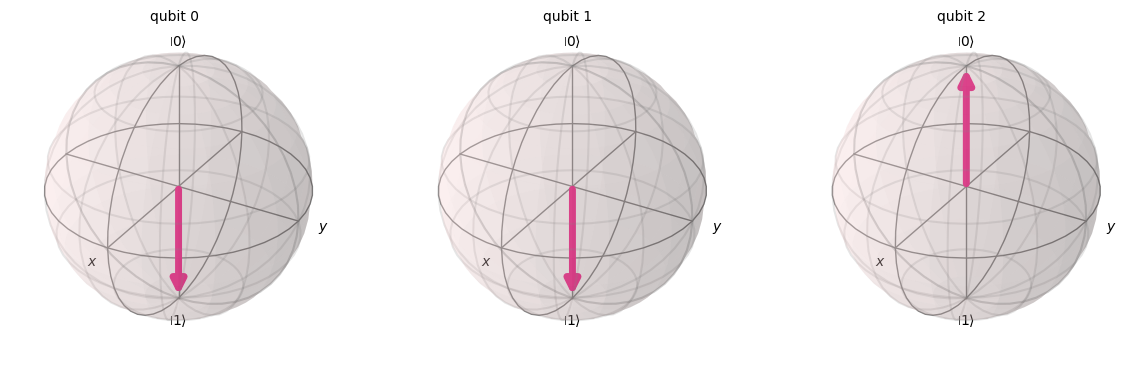

State vectors after applying the Toffoli gate:


<IPython.core.display.Latex object>

Bloch sphere representation after the Toffoli gate:


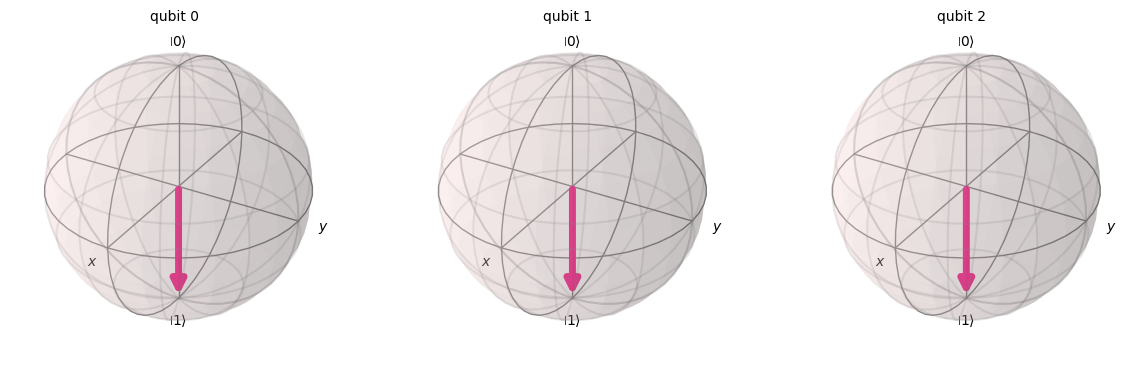

Matrix representation of the circuit after the Toffoli gate:


<IPython.core.display.Latex object>

In [16]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_bloch_multivector, array_to_latex
from qiskit.quantum_info import Statevector, Operator

# Function to visualize the state transitions for a reversible AND gate
def visualize_reversible_and_no_measure():
    # Create a quantum circuit with 3 qubits
    qc = QuantumCircuit(3)
    
    # Prepare the initial states of the input qubits for the AND operation
    qc.x(0)  # Apply NOT gate to the first qubit
    qc.x(1)  # Apply NOT gate to the second qubit

    # Visualize the initial state on the Bloch sphere
    initial_state = Statevector.from_instruction(qc)
    print("Initial state vectors (input qubits in |11> and output qubit in |0>):")
    display(array_to_latex(initial_state))
    print("Bloch sphere representation of the initial states:")
    display(plot_bloch_multivector(initial_state))
    
    # Apply the Toffoli gate (ccx)
    qc.ccx(0, 1, 2)
    
    # Visualize the state after applying the Toffoli gate
    final_state = Statevector.from_instruction(qc)
    print("State vectors after applying the Toffoli gate:")
    display(array_to_latex(final_state))
    print("Bloch sphere representation after the Toffoli gate:")
    display(plot_bloch_multivector(final_state))
    
    # Display the matrix representation of the circuit after the Toffoli gate
    print("Matrix representation of the circuit after the Toffoli gate:")
    display(array_to_latex(Operator(qc).data))

# Call the function to visualize the reversible AND gate without measurement
visualize_reversible_and_no_measure()


Quantum state vectors for systems with more than one qubit are written in tensor product space. For a three-qubit system, there are 
2
3
=
8
2 
3
 =8 possible states, ranging from 
∣
000
⟩
∣000⟩ to 
∣
111
⟩
∣111⟩. The position of the 1 in the state vector corresponds to one of these states. The state vector is ordered as follows:

[
∣
000
⟩
,
∣
001
⟩
,
∣
010
⟩
,
∣
011
⟩
,
∣
100
⟩
,
∣
101
⟩
,
∣
110
⟩
,
∣
111
⟩
]
[∣000⟩,∣001⟩,∣010⟩,∣011⟩,∣100⟩,∣101⟩,∣110⟩,∣111⟩]

Since the third position (starting from zero) corresponds to 
∣
011
⟩
∣011⟩, the state vector indicates that if a measurement were performed on this three-qubit system, the outcome would definitely be 
∣
011
⟩
∣011⟩ with 100% probability, and there is a 0% probability of measuring any other state. This specific state vector would be the result after the initial qubits are prepared in the 
∣
11
⟩
∣11⟩ state and then a Toffoli (CCNOT) gate is applied with the first two qubits as controls and the third qubit (initially in 
∣
0
⟩
∣0⟩) as the target.